<a href="https://colab.research.google.com/github/risherb/Global-Food-Waste-Analysis-Economic-and-Environmental-Insights/blob/main/EDA_of_Food_Wastage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
joebeachcapital_food_waste_path = kagglehub.dataset_download('joebeachcapital/food-waste')

print('Data source import complete.')


100%|██████████| 6.99k/6.99k [00:00<00:00, 12.0MB/s]

Extracting files...
Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# The CSV file should be located in the directory indicated by the previous cell
df=pd.read_csv(joebeachcapital_food_waste_path + "/Food Waste data and research - by country.csv")
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [6]:
#Columns present in the table
df.columns

Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object')

In [7]:
#Describing the data
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


In [8]:
#Number of Unique Countries
df['Country'].nunique()

214

**A Exploratory Analysis**

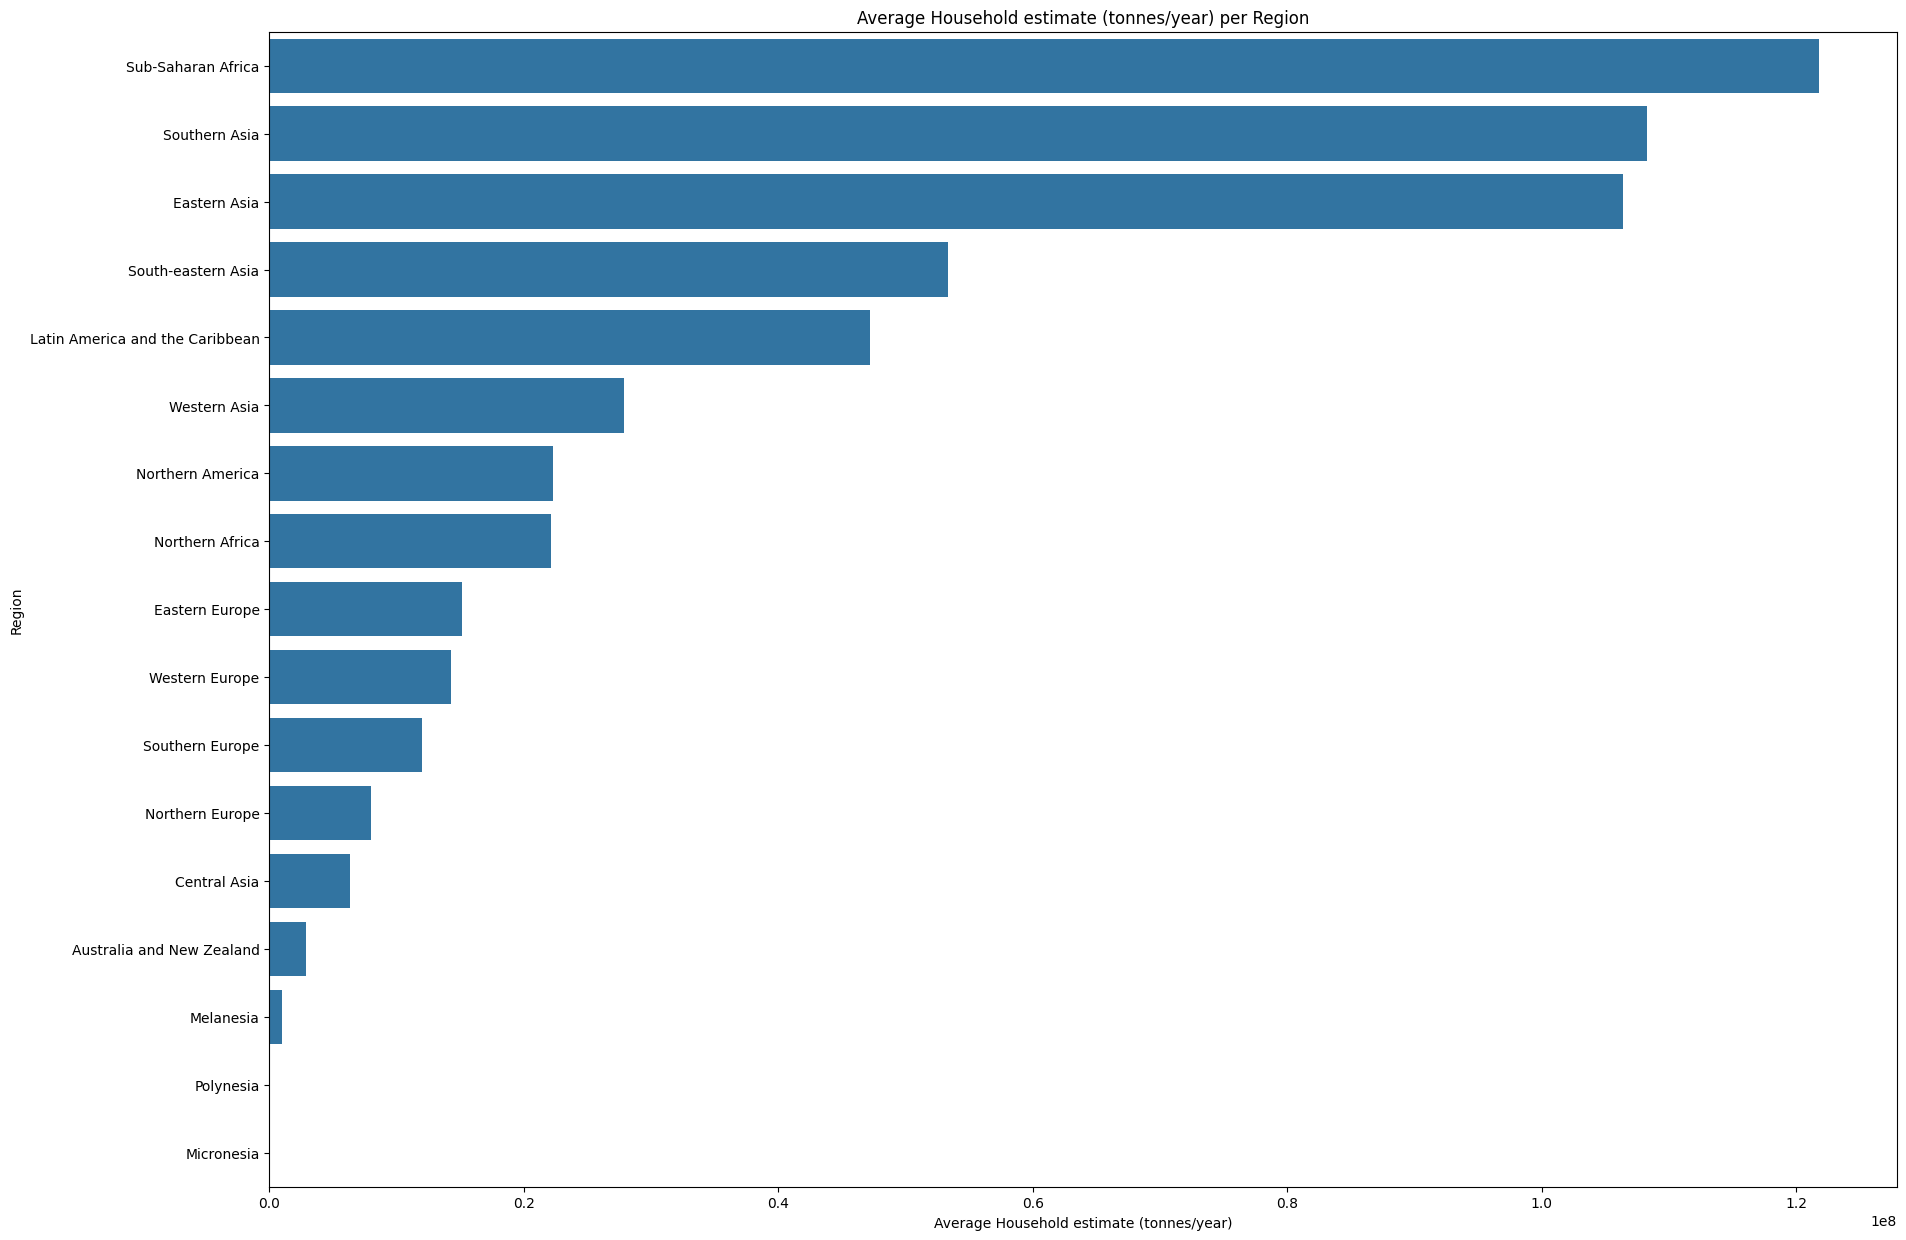

In [9]:
#Region Wise Mean Household estimate (tonnes/year)
plt.figure(figsize=(21,15))
average_wastage_household = df.groupby('Region')['Household estimate (tonnes/year)'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=average_wastage_household, y='Region', x='Household estimate (tonnes/year)')
plt.ylabel('Region')
plt.xlabel('Average Household estimate (tonnes/year)')
plt.title('Average Household estimate (tonnes/year) per Region')
plt.show()

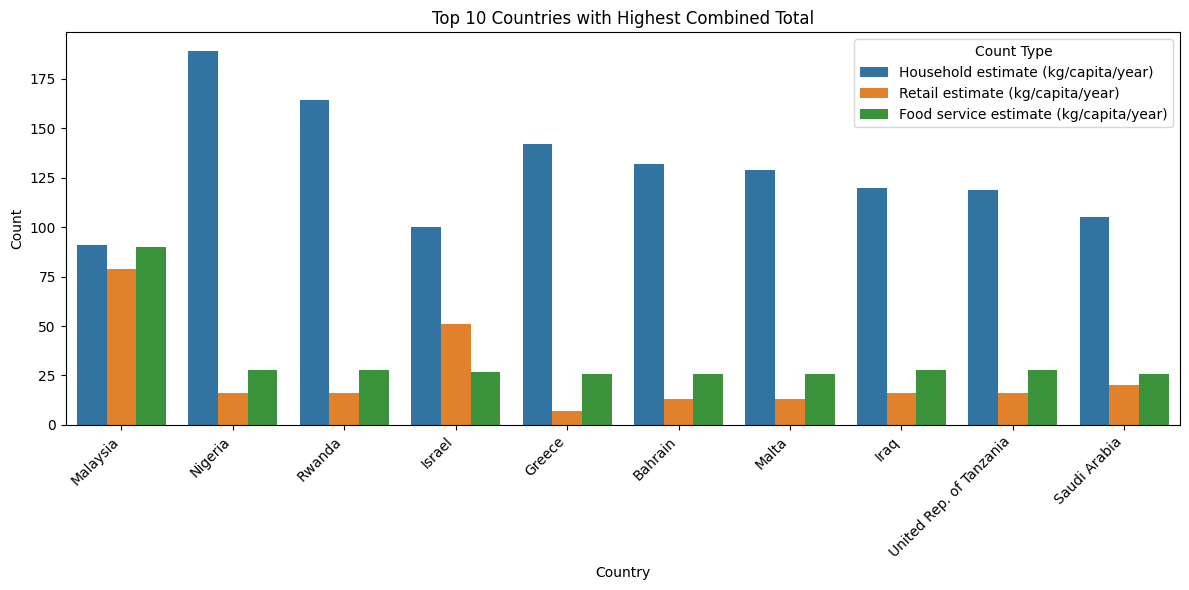

In [10]:
#Top 10 countries with Higest combined figures (kg/capita/year).
top_10_countries = df.nlargest(10, 'combined figures (kg/capita/year)')
new_df = pd.melt(top_10_countries, id_vars=['Country'], value_vars=['Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)','Food service estimate (kg/capita/year)'],
                    var_name='count_type', value_name='count')
plt.figure(figsize=(12, 6))
sns.barplot(data=new_df, x='Country', y='count', hue='count_type')
plt.title('Top 10 Countries with Highest Combined Total')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Count Type', loc='upper right')
plt.tight_layout()
plt.show()

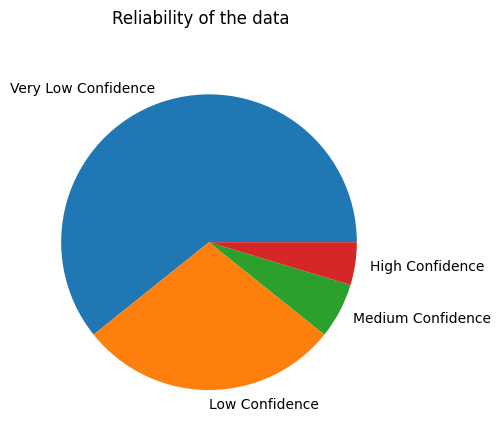

In [11]:
#Confidence level of data
df['Confidence in estimate'].value_counts().plot(kind='pie',subplots=True)
plt.suptitle('Reliability of the data')
plt.ylabel("")
plt.show()

Note:
Most of the data is very Low Confidence and hence not a reliable source of Information

In [12]:
#Worldwide food wastage distribution
import folium
from folium import plugins

In [14]:
#We will use folium module for seeing the food wastage across world
# Initialize the map
# Load the world geojson file for countries' boundaries
world_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

# Create a folium map centered on a location (e.g., coordinates of the world center)
map_center = [0, 0]
map_zoom = 2
world_map = folium.Map(location=map_center, zoom_start=map_zoom,tiles='Stamen Terrain',
                       attr='&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> &copy; <a href="http://stamen.com">Stamen Design</a>')
                       # Added attribution for Stamen Terrain tiles


# Add a choropleth layer to display World-wide Net wastage

folium.Choropleth(
    geo_data=world_geojson,
    data=df,
    name='Net Wastage in the world',
    columns=['Country', 'combined figures (kg/capita/year)'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Net food wastage- Combined (kg/capita/year)',
    highlight=True
).add_to(world_map)

# Move the legend to the bottom right corner
world_map.add_child(folium.map.LayerControl(position='bottomright'))
world_map

In [15]:
import plotly.express as px

fig = px.scatter(df, x="Household estimate (kg/capita/year)",
                 y="Retail estimate (kg/capita/year)",
                 size="Food service estimate (kg/capita/year)",
                 color="Region",
                 hover_name="Country",
                 title="Correlation Between Household and Retail Food Waste by Region")
fig.update_layout(width=900, height=600)
fig.show()


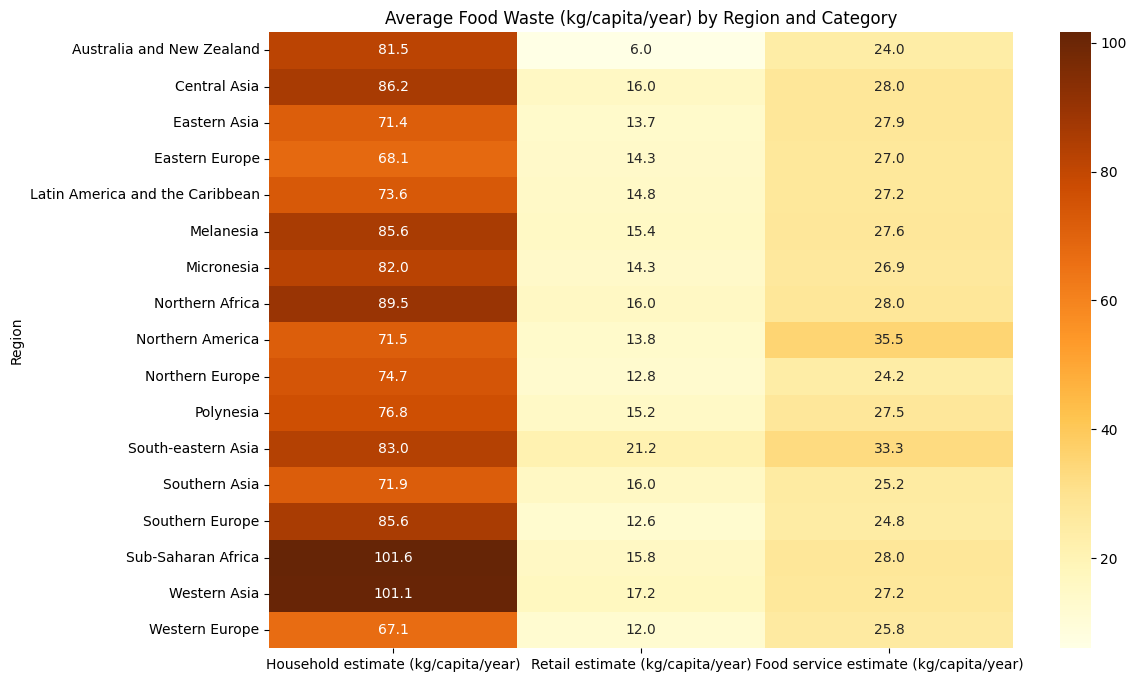

In [16]:
plt.figure(figsize=(12, 8))
regional_waste = df.groupby("Region")[["Household estimate (kg/capita/year)",
                                       "Retail estimate (kg/capita/year)",
                                       "Food service estimate (kg/capita/year)"]].mean()
sns.heatmap(regional_waste, annot=True, cmap="YlOrBr", fmt=".1f")
plt.title("Average Food Waste (kg/capita/year) by Region and Category")
plt.show()


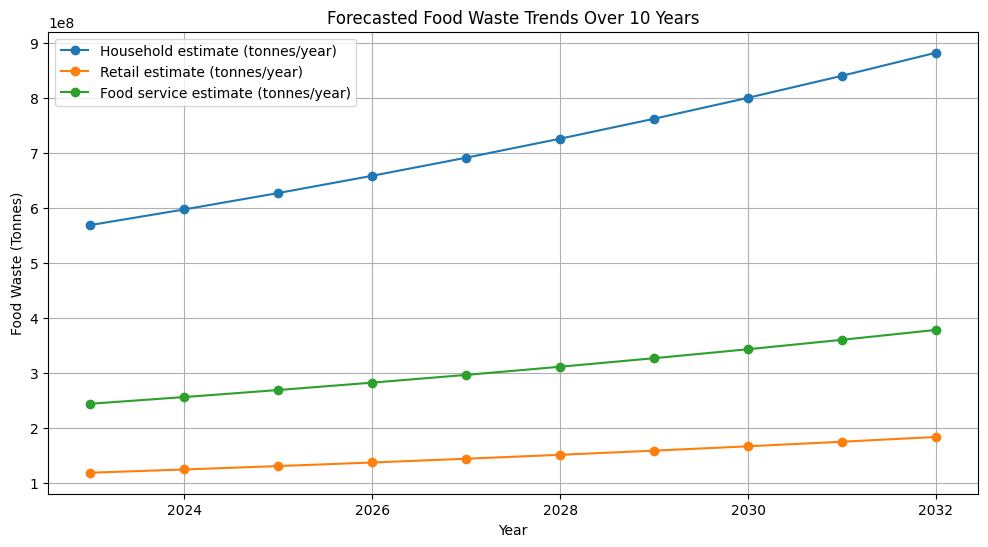

In [17]:
# Set a hypothetical increase rate for illustration
increase_rate = 0.05
years = 10
forecast = pd.DataFrame()
forecast["Year"] = np.arange(2023, 2023 + years)

for col in ["Household estimate (tonnes/year)", "Retail estimate (tonnes/year)", "Food service estimate (tonnes/year)"]:
    forecast[col] = df[col].sum() * (1 + increase_rate) ** np.arange(years)

plt.figure(figsize=(12, 6))
for col in ["Household estimate (tonnes/year)", "Retail estimate (tonnes/year)", "Food service estimate (tonnes/year)"]:
    plt.plot(forecast["Year"], forecast[col], marker="o", label=col)

plt.title("Forecasted Food Waste Trends Over 10 Years")
plt.xlabel("Year")
plt.ylabel("Food Waste (Tonnes)")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
fig = px.sunburst(df, path=["Region", "Country"],
                  values="combined figures (kg/capita/year)",
                  color="combined figures (kg/capita/year)",
                  color_continuous_scale="Viridis",
                  title="Regional Distribution of Combined Food Wastage")
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()


In [19]:
df['Year'] = 2020  # Assuming a base year
for i in range(5):  # Create hypothetical data for 5 years
    temp_df = df.copy()
    temp_df['Year'] = 2021 + i
    temp_df['combined figures (kg/capita/year)'] *= (1 + np.random.uniform(-0.03, 0.03, len(df)))
    df = pd.concat([df, temp_df])

fig = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",
                    color="combined figures (kg/capita/year)",
                    hover_name="Country",
                    animation_frame="Year",
                    title="Progression of Food Wastage Over Time (Hypothetical)",
                    color_continuous_scale="Blues")
fig.update_geos(projection_type="natural earth")
fig.show()
